# Recommender System
- content-based Recommender System(CB)
    - 根據消費者喜好的產品內容做推薦
- Collaborative Filtering (CF)
    - 根據消費者的行為，將之分群到類似消費行為的「 顧客群 」，再推薦這個顧客群喜歡的產品
    - Memory-based Collaborative Filtering
    - Model-base Collaborative Filtering
        - singular value decompositio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
columns_names=['user_id','item_id','rating','timestamp']

In [82]:
a=pd.read_csv("u.data",sep="\t")

In [84]:
#若引入檔案時，沒有column，會自動將第一筆視為index
a.head()

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [17]:
df=pd.read_csv("u.data",sep="\t",names=columns_names)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [20]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [23]:
movie_title=pd.read_csv("Movie_Id_Titles",sep=",")

In [29]:
df=df.merge(movie_title,how="left",on="item_id")

In [35]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [40]:
# 五的話可能代表只有一個人給予評論而已
df.groupby("title").mean()["rating"].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [46]:
# 看哪一個影片比較多評論數
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Star Wars (1977)                                     584
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

In [47]:
ratings=pd.DataFrame(df.groupby("title").mean()["rating"])

In [48]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


# EDA

In [52]:
# 看評論平均為多少，然後評論數有多少
ratings["num of ratings"]=df.groupby("title").count()["rating"]

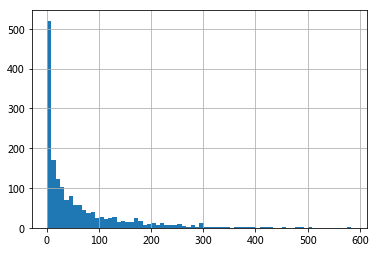

In [61]:
#觀察全部電影評論數的數值分佈
ratings["num of ratings"].hist(bins=70)

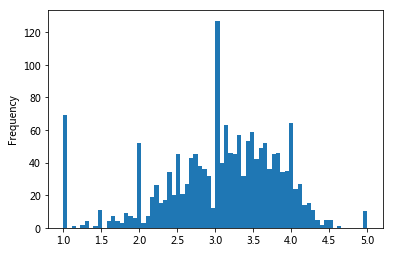

In [193]:
# 觀察全部電影，平均點擊的數值分佈狀況
ratings["rating"].plot.hist(bins=70)

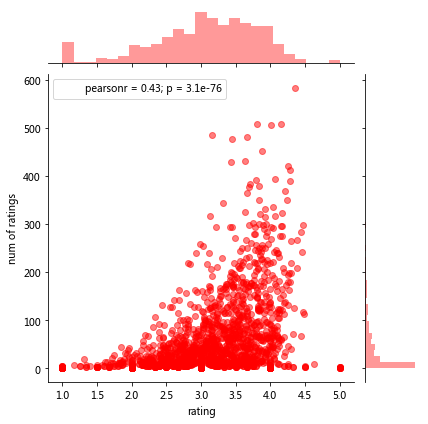

In [85]:
# 觀察每部電影的評論數與平均評比關係為何，發現評比越高 評論數越多
# outliers(異常值) : 只有一個人評比五顆星
sns.jointplot(x="rating",y="num of ratings",data=ratings,color="Red",alpha=.5)

# Recommender System
- corr() find relationshop in one DataFrame
- corrwith() find relationshop between two DataFrame
- Step:沒有分群，是以 item Similarity，content-base Recommandation
    - 先找到每個會員對於每部電影的評論
    - 挑選兩部最多評論電影
    - 從全部的電影與這兩部電影找相關係數
    - 再根據EDA的結果，清除異常值
        - 相關係數高不一定正相關，有時跟樣本數有關，所以要選一個合理的threshold，意味著數量要夠 
    - 相關係數越近代表他們越喜歡看所選那兩部性質的電影

In [110]:
# 每個人看過哪些movie的評論等級
# 會先形成 index * columns 的關係，然後看rating的平均，可是基本上每個人都只會對影片評論一次而已，所以球平均還是原值
moviemat=pd.pivot_table(data=df,index="user_id",columns="title",values="rating",aggfunc="mean")

In [111]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
ratings.sort_values("num of ratings",ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


# 根據item的相關程度，看哪些其他item與所選item相關
- 以 star wars 為例

In [115]:
#從評論數多的電影挑兩部，看大家對於這兩部電影的回應
starwars_user_ratings = moviemat["Star Wars (1977)"]

In [117]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [128]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
#可以比較這兩個series的關係
# 比較 moviemat 所有欄位，與另外的 series或是DataFrame 找出相關係數
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [136]:
similar_to_starwars.sort_values(ascending=False)

title
No Escape (1994)                                                                     1.000000
Man of the Year (1995)                                                               1.000000
Hollow Reed (1996)                                                                   1.000000
Commandments (1997)                                                                  1.000000
Cosi (1996)                                                                          1.000000
Stripes (1981)                                                                       1.000000
Golden Earrings (1947)                                                               1.000000
Mondo (1996)                                                                         1.000000
Line King: Al Hirschfeld, The (1996)                                                 1.000000
Outlaw, The (1943)                                                                   1.000000
Hurricane Streets (1998)                              

In [138]:
corr_starwars=pd.DataFrame(similar_starwars,columns=["Correlation"])
corr_starwars.dropna(inplace=True)

In [146]:
# 當樣本數只有1個的時候，相關係數為1
corr_starwars.sort_values("Correlation",ascending=False)

,Correlation
title,
Commandments (1997),1.000000
Cosi (1996),1.000000
No Escape (1994),1.000000
Stripes (1981),1.000000
Man of the Year (1995),1.000000
Hollow Reed (1996),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
"Good Man in Africa, A (1994)",1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000


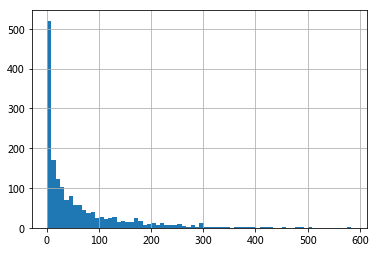

In [145]:
ratings["num of ratings"].hist(bins=70)

In [152]:
corr_starwars = corr_starwars.join(ratings["num of ratings"])

ValueError: columns overlap but no suffix specified: Index(['num of ratings'], dtype='object')

In [155]:
#remove exceptional sample
corr_starwars[corr_starwars["num of ratings"]>100].sort_values("Correlation",ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


# 根據item的相關程度，看哪些其他item與所選item相關

In [178]:
liar_liar_user_ratings = moviemat["Liar Liar (1997)"]

In [179]:
similar_to_liarliar = moviemat.corrwith(liar_liar_user_ratings)
similar_to_liarliar.dropna(inplace=True)

/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [180]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=["Correlation"])

In [182]:
corr_liarliar = corr_liarliar.join(ratings["num of ratings"])

In [185]:
corr_liarliar[corr_liarliar["num of ratings"]>=100].sort_values("Correlation",ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


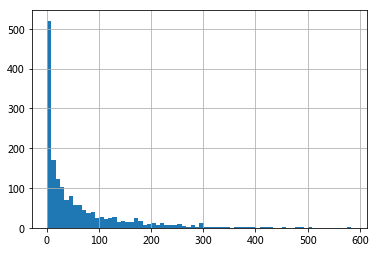

In [170]:
ratings["num of ratings"].hist(bins=70)

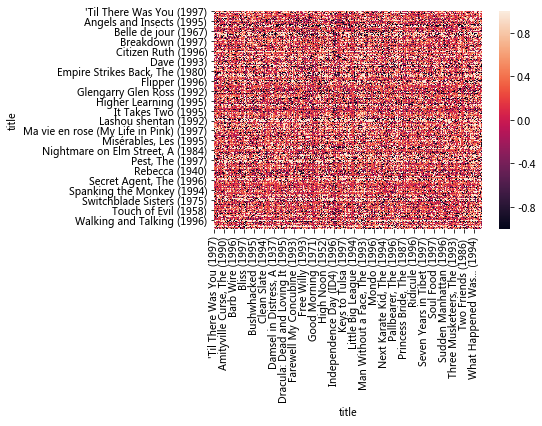

In [199]:
sns.heatmap(moviemat.corr())